# Data cleaning

## Importing packages and table data

In [33]:
#importing packages and table data
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import ceil
pd.options.mode.copy_on_write = True 
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

def index_to_table(table):
    table['timestamp'] = pd.to_datetime(table['timestamp'])   # convert column to datetime
    table = table.set_index('timestamp')                 # set as index
    table = table.asfreq("h")  
    return table

train_noindex = pd.read_csv('C:/Users/droni/Documents/Ulikool MASM/1 sem/ITS8080 Andmed/253253MASM/train_253253.csv',  delimiter=',',decimal='.', index_col = False)
train_noindex.head()
train = index_to_table(train_noindex)


## Task 4.1 (a) 

#### Constructing table for this tast

In [8]:
# table
df_noindex = train_noindex[['timestamp', 'pv_mod1', 'pv_mod2', 'pv_mod3', 'pv', 'daymax', 'Temperature']]
df = index_to_table(df_noindex)
#table with only pv values
clean_pv_noindex= train_noindex[['timestamp', 'pv']]
clean_pv = index_to_table(clean_pv_noindex)

df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2013-07-01 00:00:00+00:00 to 2014-06-30 23:00:00+00:00
Freq: h
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pv_mod1      8321 non-null   float64
 1   pv_mod2      8268 non-null   float64
 2   pv_mod3      8249 non-null   float64
 3   pv           8759 non-null   float64
 4   daymax       8759 non-null   float64
 5   Temperature  8759 non-null   float64
dtypes: float64(6)
memory usage: 479.1 KB


In [9]:
#amount of missing values
print("\nMissing values per column:")
missing_values = df.isnull().sum()
print(missing_values)


Missing values per column:
pv_mod1        439
pv_mod2        492
pv_mod3        511
pv               1
daymax           1
Temperature      1
dtype: int64


In [26]:
#finding exact missing values
missing_times = df.index[df["pv_mod1"].isna()]
print("Missing timestamps:")
print(missing_times)

total_cells = np.prod(df.shape)
total_missing = 511

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print("\nMissing % in pv_mod3:", round(percent_missing,2))

total_missing1 = 439
# percent of data that is missing
percent_missing1 = (total_missing1/total_cells) * 100
print("\nMissing % in pv_mod1:", round(percent_missing1, 2))

missing_times2 = df.index[df["pv_mod2"].isna()]

total_cells = np.prod(df.shape)
total_missing2 = 492

# percent of data that is missing
percent_missing2 = (total_missing2/total_cells) * 100
print("\nMissing % in pv_mod2:", round(percent_missing2, 2))

Missing timestamps:
DatetimeIndex(['2013-07-02 02:00:00+00:00', '2013-07-02 04:00:00+00:00',
               '2013-07-02 08:00:00+00:00', '2013-07-02 21:00:00+00:00',
               '2013-07-03 23:00:00+00:00', '2013-07-04 05:00:00+00:00',
               '2013-07-04 14:00:00+00:00', '2013-07-06 05:00:00+00:00',
               '2013-07-06 14:00:00+00:00', '2013-07-07 21:00:00+00:00',
               ...
               '2014-06-23 12:00:00+00:00', '2014-06-23 19:00:00+00:00',
               '2014-06-24 02:00:00+00:00', '2014-06-24 07:00:00+00:00',
               '2014-06-24 09:00:00+00:00', '2014-06-25 06:00:00+00:00',
               '2014-06-26 09:00:00+00:00', '2014-06-29 15:00:00+00:00',
               '2014-06-30 04:00:00+00:00', '2014-06-30 18:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='timestamp', length=439, freq=None)

Missing % in pv_mod3: 0.97

Missing % in pv_mod1: 0.84

Missing % in pv_mod2: 0.94


In [29]:
#controlling how many rows, that are not missing, are different from original value
print('Amount of different values compare to orginal data:') 
count_diff1 = ((df['pv_mod1'] != clean_pv['pv']) & df['pv_mod1'].notna() & clean_pv['pv'].notna()).sum()
print(count_diff1)
count_diff2 = ((df['pv_mod2'] != clean_pv['pv']) & df['pv_mod2'].notna() & clean_pv['pv'].notna()).sum()
print(count_diff2)
count_diff3 = ((df['pv_mod3'] != clean_pv['pv']) & df['pv_mod3'].notna() & clean_pv['pv'].notna()).sum()
print(count_diff3)

Amount of different values compare to orginal data:
0
0
0


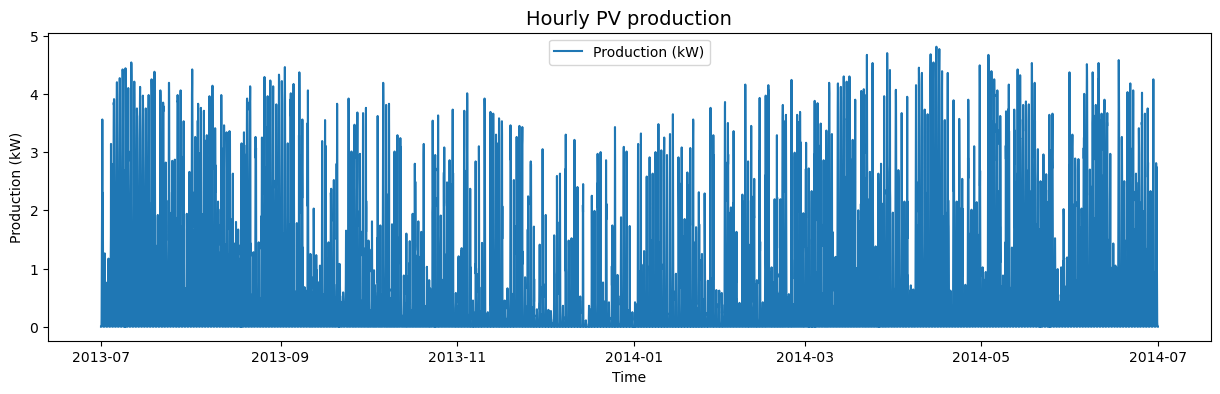

In [30]:
#chart of Demand
plt.figure(figsize=(15,4))
plt.plot(df["pv"], label="Production (kW)")
plt.title("Hourly PV production", fontsize=14)
plt.xlabel("Time")
plt.ylabel("Production (kW)")
plt.legend()
plt.show()

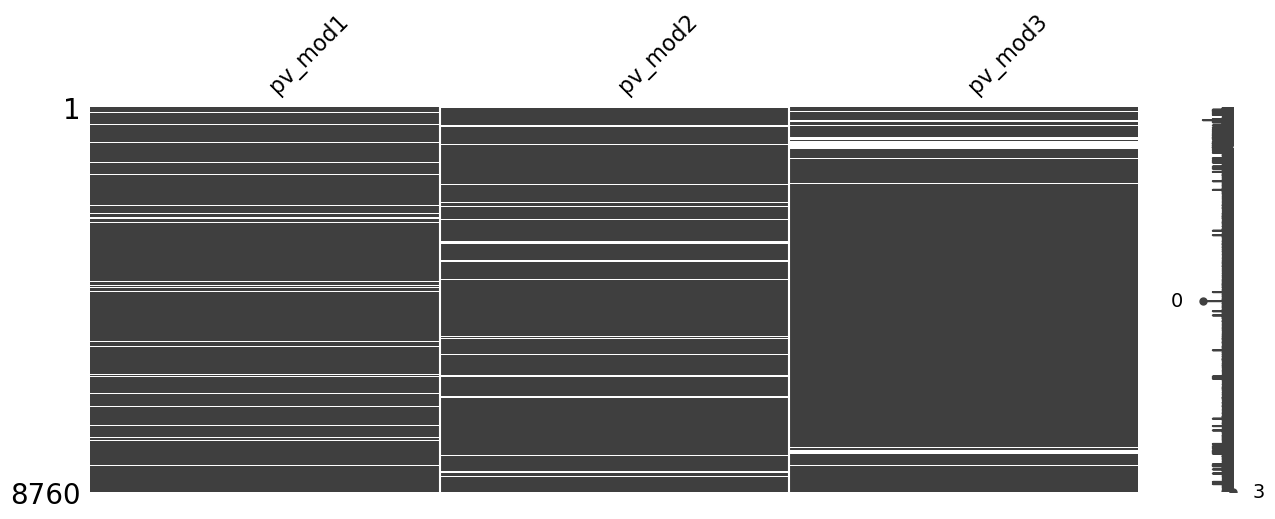

In [31]:
#missinf values chart, there can be seen reason of missingness
msno.matrix(df[['pv_mod1', 'pv_mod2', 'pv_mod3']],figsize=(15,5))
plt.show();

In [11]:
#descripn helps to understand max values and averages.
print(df.describe())

           pv_mod1      pv_mod2      pv_mod3           pv       daymax  \
count  8321.000000  8268.000000  8249.000000  8759.000000  8759.000000   
mean      0.659887     0.518424     0.587106     0.659565     2.886822   
std       1.106557     0.925682     1.043774     1.106453     1.219990   
min       0.000000     0.000000     0.000000     0.000000     0.110000   
25%       0.000000     0.000000     0.000000     0.000000     1.940000   
50%       0.000000     0.000000     0.000000     0.000000     3.190000   
75%       0.820000     0.610000     0.660000     0.820000     3.890000   
max       4.810000     4.420000     4.810000     4.810000     4.810000   

       Temperature  
count  8759.000000  
mean      7.515413  
std       8.312251  
min     -18.300000  
25%       2.000000  
50%       6.800000  
75%      14.000000  
max      28.900000  


## Task 4.1 (b)

In [12]:
#dependence of pv_mod2 on daymax value, we do not have values more that 0,95% of daymax
count_equal2 = (df['pv_mod2'] == train['daymax']).sum()
print("pv_mod2 equal to daymax numbers amount of times:")
print(count_equal2)
 
df['daymax_0.95'] = train['daymax']*0.95

count_equal2_5per = (df['pv_mod2'] >= df['daymax_0.95']).sum()
print("pv_mod2 equal to 0.95% of daymax numbers amount of times:")
print(count_equal2_5per)

pv_mod2 equal to daymax numbers amount of times:
0
pv_mod2 equal to 0.95% of daymax numbers amount of times:
0


In [13]:
#dependence of pv_mod2 on temperature more than 20 C. no datas then temp is more than 20C
violations = df[(train['Temperature'] > 20) & train['pv_mod3'].notna()]
print(violations)

Empty DataFrame
Columns: [pv_mod1, pv_mod2, pv_mod3, pv, daymax, Temperature, daymax_0.95]
Index: []


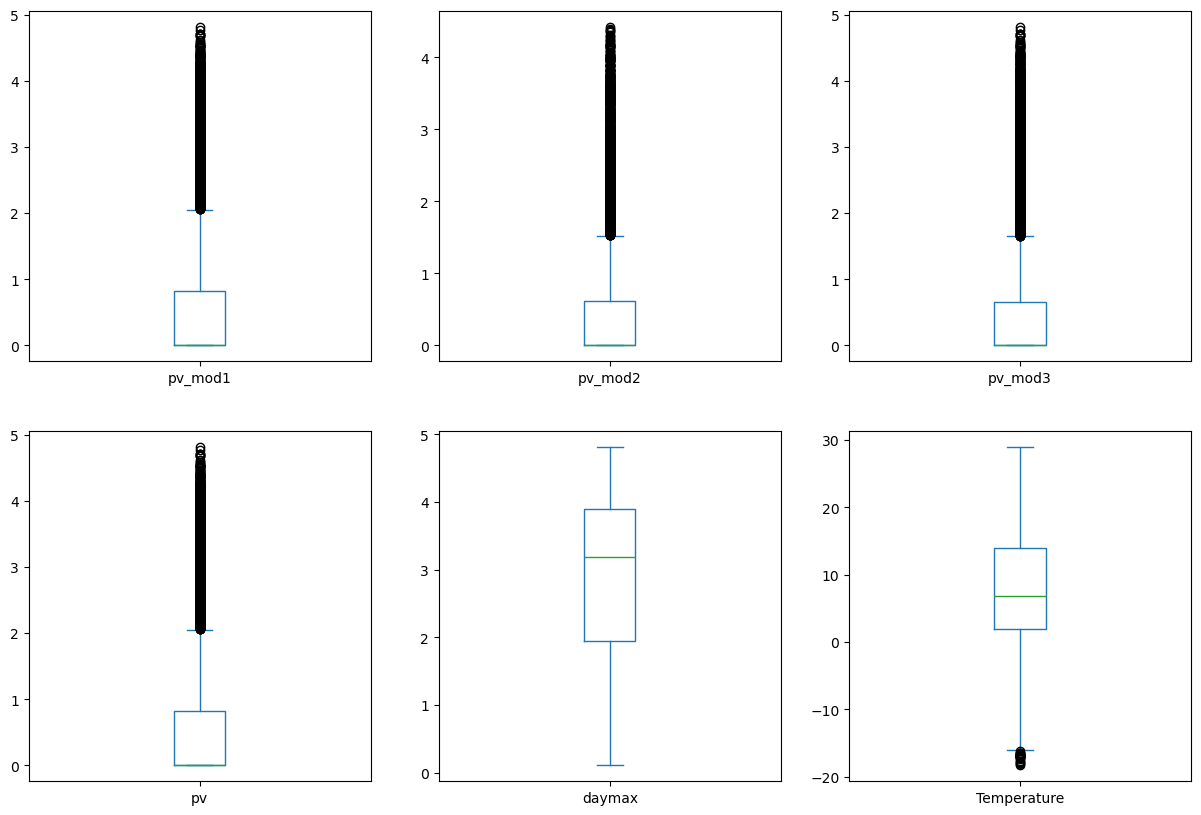

In [35]:
#Box chart
df.plot(kind='box', subplots=True, layout=(ceil(len(df.columns)/3), 3), figsize=(15,10))
plt.show()

## Task 4.1 (c)

In [36]:
#Deletion
pv_m1 = df[['pv_mod1']].copy()
pv_m1.info()
pv_m1_na_dropped = pv_m1.dropna(axis=0)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2013-07-01 00:00:00+00:00 to 2014-06-30 23:00:00+00:00
Freq: h
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pv_mod1  8321 non-null   float64
dtypes: float64(1)
memory usage: 136.9 KB


In [38]:
#controlling NaN values
pv_m1.isnull().sum()

pv_mod1    439
dtype: int64

In [41]:
#making table for missing values
missing = pv_m1[pv_m1.isnull()['pv_mod1'] == True]
missing.head()

,pv_mod1
timestamp,
2013-07-02 02:00:00+00:00,NaN
2013-07-02 04:00:00+00:00,NaN
2013-07-02 08:00:00+00:00,NaN
2013-07-02 21:00:00+00:00,NaN
2013-07-03 23:00:00+00:00,NaN


In [42]:
#making mean imputation and adding it to a talbe
mean = pd.DataFrame(df['pv_mod1'].fillna(df['pv_mod1'].mean()))
mean.rename(columns = {'pv_mod1':'mean'}, inplace=True)

missing = missing.join(mean) 
print(missing)

                           pv_mod1      mean
timestamp                                   
2013-07-02 02:00:00+00:00      NaN  0.659887
2013-07-02 04:00:00+00:00      NaN  0.659887
2013-07-02 08:00:00+00:00      NaN  0.659887
2013-07-02 21:00:00+00:00      NaN  0.659887
2013-07-03 23:00:00+00:00      NaN  0.659887
...                            ...       ...
2014-06-25 06:00:00+00:00      NaN  0.659887
2014-06-26 09:00:00+00:00      NaN  0.659887
2014-06-29 15:00:00+00:00      NaN  0.659887
2014-06-30 04:00:00+00:00      NaN  0.659887
2014-06-30 18:00:00+00:00      NaN  0.659887

[439 rows x 2 columns]


In [43]:
#making linear imputation and adding it to a talbe
li = pv_m1.interpolate(method ='linear', limit_direction ='forward')
li.rename(columns = {'pv_mod1':'li'}, inplace=True)

missing = missing.join(li) 
print(missing)

                           pv_mod1      mean     li
timestamp                                          
2013-07-02 02:00:00+00:00      NaN  0.659887  0.000
2013-07-02 04:00:00+00:00      NaN  0.659887  0.035
2013-07-02 08:00:00+00:00      NaN  0.659887  0.885
2013-07-02 21:00:00+00:00      NaN  0.659887  0.000
2013-07-03 23:00:00+00:00      NaN  0.659887  0.000
...                            ...       ...    ...
2014-06-25 06:00:00+00:00      NaN  0.659887  0.945
2014-06-26 09:00:00+00:00      NaN  0.659887  1.655
2014-06-29 15:00:00+00:00      NaN  0.659887  0.535
2014-06-30 04:00:00+00:00      NaN  0.659887  0.100
2014-06-30 18:00:00+00:00      NaN  0.659887  0.140

[439 rows x 3 columns]


## Task 4.2

In [44]:
#adding missing values to a full table
pv_m1['pv_mod1_mean'] = pv_m1['pv_mod1']
pv_m1['pv_mod1_li']   = pv_m1['pv_mod1']

#substitute into gaps
mask = pv_m1['pv_mod1'].isna()

#substitute the recovered values
pv_m1.loc[missing.index, 'pv_mod1_mean'] = missing['mean']
pv_m1.loc[missing.index, 'pv_mod1_li']   = missing['li']
print(pv_m1)
pv_m1.info()

                           pv_mod1  pv_mod1_mean  pv_mod1_li
timestamp                                                   
2013-07-01 00:00:00+00:00     0.00          0.00        0.00
2013-07-01 01:00:00+00:00     0.00          0.00        0.00
2013-07-01 02:00:00+00:00     0.00          0.00        0.00
2013-07-01 03:00:00+00:00     0.00          0.00        0.00
2013-07-01 04:00:00+00:00     0.00          0.00        0.00
...                            ...           ...         ...
2014-06-30 19:00:00+00:00     0.02          0.02        0.02
2014-06-30 20:00:00+00:00     0.00          0.00        0.00
2014-06-30 21:00:00+00:00     0.00          0.00        0.00
2014-06-30 22:00:00+00:00     0.00          0.00        0.00
2014-06-30 23:00:00+00:00     0.00          0.00        0.00

[8760 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2013-07-01 00:00:00+00:00 to 2014-06-30 23:00:00+00:00
Freq: h
Data columns (total 3 columns):
 #   Column        N

In [45]:
#mean and other values
summary_pv_m1 = pd.DataFrame({
    'Original': pv_m1['pv_mod1'].dropna(),
    'Imputed_Mean': pv_m1['pv_mod1_mean'],
    'Imputed_Linear': pv_m1['pv_mod1_li']
}).describe()

print(summary_pv_m1)

          Original  Imputed_Mean  Imputed_Linear
count  8321.000000   8760.000000     8760.000000
mean      0.659887      0.659887        0.659960
std       1.106557      1.078470        1.103778
min       0.000000      0.000000        0.000000
25%       0.000000      0.000000        0.000000
50%       0.000000      0.000000        0.000000
75%       0.820000      0.740000        0.820000
max       4.810000      4.810000        4.810000


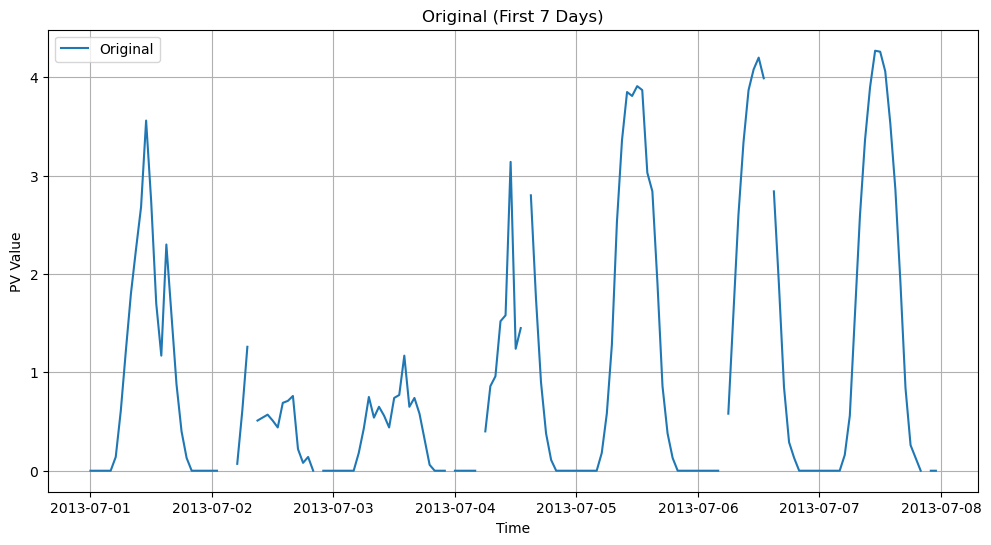

In [46]:
# original chart
sample = pv_m1.iloc[:24*7]  # fisrt 30 days

plt.figure(figsize=(12, 6))
plt.plot(sample.index, sample['pv_mod1'], label='Original')

plt.xlabel("Time")
plt.ylabel("PV Value")
plt.title("Original (First 7 Days)")
plt.legend()
plt.grid(True)
plt.show()

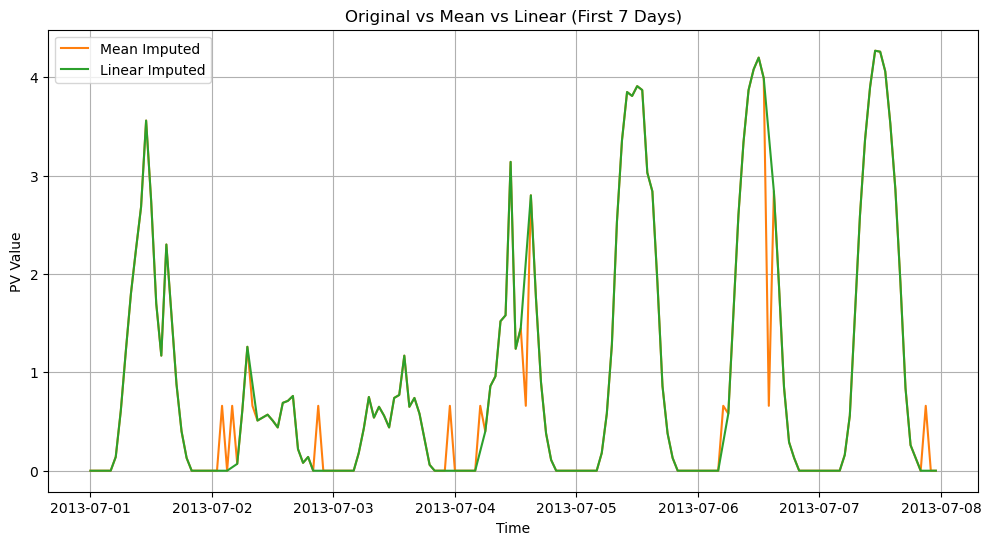

In [47]:
#Mean and linear imputation charts
sample = pv_m1.iloc[:24*7]

plt.figure(figsize=(12, 6))
plt.plot(sample.index, sample['pv_mod1_mean'], label='Mean Imputed', color='tab:orange')
plt.plot(sample.index, sample['pv_mod1_li'], label='Linear Imputed', color='tab:green')

plt.xlabel("Time")
plt.ylabel("PV Value")
plt.title("Original vs Mean vs Linear (First 7 Days)")
plt.legend()
plt.grid(True)
plt.show()